In [1]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt 
from scipy import io
import scipy
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [52]:
filename = r'E:\7.实验数据\group_data4.mat'
total_groups = io.loadmat(filename)
total_groups_load = total_groups['group_data']
print(type(total_groups_load))
print(total_groups_load.shape)

<class 'numpy.ndarray'>
(1591, 2391, 3)


In [53]:
total_groups_load_2D = (total_groups_load.reshape(total_groups_load.shape[0]*total_groups_load.shape[1],total_groups_load.shape[2]))
print(total_groups_load_2D.shape)

(3804081, 3)


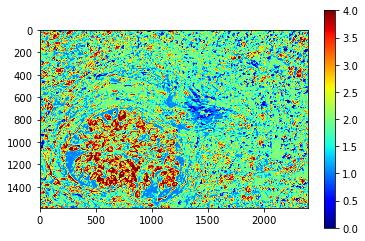

In [51]:
filename1 = r'E:\application\new_result.mat'
cluster = io.loadmat(filename1)
clusters = cluster['new_result']
plt.imshow(clusters,cmap = 'jet')
plt.colorbar()
plt.savefig('clusters.jpg',dpi=3000,bbox_inches='tight')

# PCA 数据降维

In [54]:
X_scaler = StandardScaler()
x_data = X_scaler.fit_transform(total_groups_load_2D)
x_data.shape
X_minmax = MinMaxScaler()
x_data_1 = X_minmax.fit_transform(x_data)

In [59]:
pca = PCA(n_components=2)
pca.fit(total_groups_load_2D)
data_pca = pca.transform(total_groups_load_2D)
print(data_pca.shape)

(3804081, 2)


In [19]:
pca.explained_variance_ratio_

array([0.94117574, 0.05312564])

In [20]:
io.savemat('data_pca.mat',{'data_pca':data_pca})

# GaussianMixture


In [55]:
model_GMM = GaussianMixture(n_components = 5)
dix_GMM = model_GMM.fit(x_data)

In [56]:
yhat_GMM = model_GMM.predict(x_data)

In [57]:
data_aic = model_GMM.aic(x_data)
data_bic = model_GMM.bic(x_data)
print(data_aic)
print(data_bic)

19080076.259155445
19080720.68682024


In [58]:
data_score = model_GMM.score(x_data)
print(data_score)

-2.5078301775324245


In [59]:
io.savemat('data_aic.mat',{'data_aic':data_aic})
io.savemat('data_bic.mat',{'data_bic':data_bic})

In [60]:
proba = model_GMM.predict_proba(x_data)
proba.shape

(3804081, 5)

In [61]:
io.savemat('predict_proba.mat',{'proba':proba})

<class 'numpy.ndarray'>


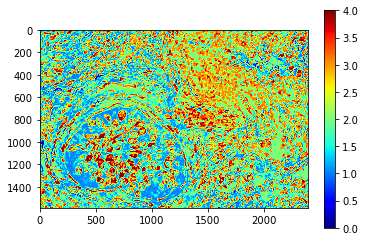

In [66]:
cluster_result_GMM = yhat_GMM.reshape(total_groups_load.shape[0],total_groups_load.shape[1])
plt.imshow(cluster_result_GMM,cmap = 'jet')
plt.colorbar()
plt.savefig('cluster_result_GMM.jpg',dpi=3000,bbox_inches='tight')
print(type(cluster_result_GMM))

In [67]:
io.savemat('cluster_result_GMM.mat',{'cluster_result_GMM':cluster_result_GMM})

In [26]:
weights_GMM = dix_GMM.weights_
means_GMM = dix_GMM.means_
covariance_GMM = dix_GMM.covariances_
print(weights_GMM.shape)
print(means_GMM.shape)
print(covariance_GMM.shape)
print(weights_GMM)
print(means_GMM)
print(covariance_GMM)

(8,)
(8, 6)
(8, 6, 6)
[0.2140946  0.03993585 0.12510625 0.31326814 0.0083529  0.01299951
 0.23981583 0.04642691]
[[7.69305600e-02 5.43023462e-02 6.48148420e-03 1.26343309e+00
  5.38028268e-02 4.85546693e-01]
 [3.48439143e-02 2.59932855e-02 2.85248041e-02 2.83179379e+00
  1.69573847e-01 4.77710476e-01]
 [2.55966916e-02 1.88014551e-02 1.32781713e-02 1.81156909e+00
  6.00632165e-02 4.87775485e-01]
 [1.19019404e-02 4.73685303e-03 3.56377912e-03 1.12769814e+00
  1.99873031e-02 4.93413840e-01]
 [2.48848338e-01 1.70922685e-01 2.87369982e-02 2.72558326e+00
  3.75423896e-01 4.52564096e-01]
 [5.91600111e-02 4.29280663e-02 4.94945892e-02 7.83459899e+00
  9.28204585e-01 4.53437304e-01]
 [1.85150977e-02 1.23652421e-02 6.53920232e-03 1.25242506e+00
  2.87906639e-02 4.91621262e-01]
 [1.34389613e-01 9.57272442e-02 1.48138568e-02 1.74144820e+00
  1.20559885e-01 4.76213370e-01]]
[[[ 1.68480678e-03  1.16798199e-03  1.59982523e-05  6.11741176e-04
    9.34868130e-04 -2.32057153e-04]
  [ 1.16798199e-03  8.4

In [27]:
io.savemat('weights_GMM.mat',{'weights_GMM':weights_GMM})
io.savemat('means_GMM.mat',{'means_GMM':means_GMM})
io.savemat('covariance_GMM.mat',{'covariance_GMM':covariance_GMM})

In [28]:
cluster_1 = np.array([yhat_GMM == 0])
clusters_1 = cluster_1 + 0
clusters_1 = clusters_1.reshape(total_groups_load.shape[0],total_groups_load.shape[1])
cluster_2 = np.array([yhat_GMM == 1])
clusters_2 = cluster_2 + 0
clusters_2 = clusters_2.reshape(total_groups_load.shape[0],total_groups_load.shape[1])
cluster_3 = np.array([yhat_GMM == 2])
clusters_3 = cluster_3 + 0
clusters_3 = clusters_3.reshape(total_groups_load.shape[0],total_groups_load.shape[1])
cluster_4 = np.array([yhat_GMM == 3])
clusters_4 = cluster_4 + 0
clusters_4 = clusters_4.reshape(total_groups_load.shape[0],total_groups_load.shape[1])
cluster_5 = np.array([yhat_GMM == 4])
clusters_5 = cluster_5 + 0
clusters_5 = clusters_5.reshape(total_groups_load.shape[0],total_groups_load.shape[1])
cluster_6 = np.array([yhat_GMM == 5])
clusters_6 = cluster_6 + 0
clusters_6 = clusters_6.reshape(total_groups_load.shape[0],total_groups_load.shape[1])
cluster_7 = np.array([yhat_GMM == 6])
clusters_7 = cluster_7 + 0
clusters_7 = clusters_7.reshape(total_groups_load.shape[0],total_groups_load.shape[1])
cluster_8 = np.array([yhat_GMM == 7])
clusters_8 = cluster_8 + 0
clusters_8 = clusters_8.reshape(total_groups_load.shape[0],total_groups_load.shape[1])

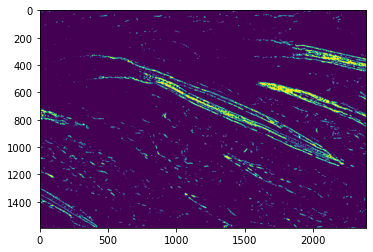

In [29]:
plt.imshow(clusters_1)
plt.savefig('clusters_1.jpg',dpi=1000,bbox_inches='tight')
plt.imshow(clusters_2)
plt.savefig('clusters_2.jpg',dpi=1000,bbox_inches='tight')
plt.imshow(clusters_3)
plt.savefig('clusters_3.jpg',dpi=1000,bbox_inches='tight')
plt.imshow(clusters_4)
plt.savefig('clusters_4.jpg',dpi=1000,bbox_inches='tight')
plt.imshow(clusters_5)
plt.savefig('clusters_5.jpg',dpi=1000,bbox_inches='tight')
plt.imshow(clusters_6)
plt.savefig('clusters_6.jpg',dpi=1000,bbox_inches='tight')
plt.imshow(clusters_7)
plt.savefig('clusters_7.jpg',dpi=1000,bbox_inches='tight')
plt.imshow(clusters_8)
plt.savefig('clusters_8.jpg',dpi=1000,bbox_inches='tight')

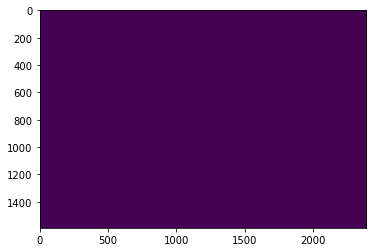

In [59]:
cluster_9 = np.array([yhat_GMM == 8])
clusters_9 = cluster_9 + 0
clusters_9 = clusters_9.reshape(total_groups_load.shape[0],total_groups_load.shape[1])
plt.imshow(clusters_9)
plt.savefig('clusters_9.jpg',dpi=1000,bbox_inches='tight')
cluster_10 = np.array([yhat_GMM == 9])
clusters_10 = cluster_10 + 0
clusters_10 = clusters_10.reshape(total_groups_load.shape[0],total_groups_load.shape[1])
plt.imshow(clusters_10)
plt.savefig('clusters_10.jpg',dpi=1000,bbox_inches='tight')
cluster_11 = np.array([yhat_GMM == 10])
clusters_11 = cluster_11 + 0
clusters_11 = clusters_11.reshape(total_groups_load.shape[0],total_groups_load.shape[1])
plt.imshow(clusters_11)
plt.savefig('clusters_11.jpg',dpi=1000,bbox_inches='tight')
cluster_12 = np.array([yhat_GMM == 11])
clusters_12 = cluster_12 + 0
clusters_12 = clusters_12.reshape(total_groups_load.shape[0],total_groups_load.shape[1])
plt.imshow(clusters_12)
plt.savefig('clusters_12.jpg',dpi=1000,bbox_inches='tight')
cluster_13 = np.array([yhat_GMM == 12])
clusters_13 = cluster_13 + 0
clusters_13 = clusters_13.reshape(total_groups_load.shape[0],total_groups_load.shape[1])
plt.imshow(clusters_13)
plt.savefig('clusters_13.jpg',dpi=1000,bbox_inches='tight')
cluster_14 = np.array([yhat_GMM == 13])
clusters_14 = cluster_14 + 0
clusters_14 = clusters_14.reshape(total_groups_load.shape[0],total_groups_load.shape[1])
plt.imshow(clusters_14)
plt.savefig('clusters_14.jpg',dpi=1000,bbox_inches='tight')

# 数据可视化

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

C:\Users\87119\AppData\Local\Temp\ipykernel_47448\636131373.py:44: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


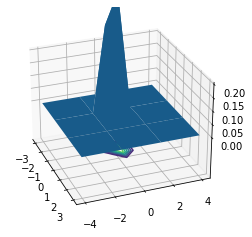

In [82]:
class Distribution():
    def __init__(self,mu,Sigma):
        self.mu = mu
        self.sigma = Sigma

    def tow_d_gaussian(self,x):
        mu = self.mu
        Sigma =self.sigma
        n = mu.shape[0]
        Sigma_det = np.linalg.det(Sigma)
        Sigma_inv = np.linalg.inv(Sigma)
        N = np.sqrt((2*np.pi)**n*Sigma_det)

        fac = np.einsum('...k,kl,...l->...',x-mu,Sigma_inv,x-mu)

        return np.exp(-fac/2)/N

    def one_d_gaussian(self,x):
        mu = self.mu
        sigma = self.sigma

        N = np.sqrt(2*np.pi*np.power(sigma,2))
        fac = np.power(x-mu,2)/np.power(sigma,2)
        return np.exp(-fac/2)/N


    
if __name__=='__main__':

    N = 10
    X = [np.linspace(-3,3,N)]
    Y = np.linspace(-4,4,N)
    X,Y = np.meshgrid(X,Y)
    mu = np.array([-1.00807579  ,0.0231944])
    Sigma = np.array([[0.18923798 , 0.10816359],[0.10816359,  0.14393795]])
    pos = np.empty(X.shape+(2,))
    pos[:,:,0]= X
    pos[:,:,1] = Y

    p2 = Distribution(mu,Sigma)
    Z = p2.tow_d_gaussian(pos)

    fig =plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X,Y,Z,rstride=3,cstride=3,linewidth=1,antialiased =True)
    cset = ax.contour(X,Y,Z,zdir='z',offset=-0.15)

    ax.set_zlim(-0.15,0.2)
    ax.set_zticks(np.linspace(0,0.2,5))
    ax.view_init(27,-21)
    plt.show()


# OLR计算

In [55]:
import math
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.stats import multivariate_normal

class BiGauss(object):
    def __init__(self, mu1, mu2, Sigma1, Sigma2, pi1, pi2, steps = 100):
        super(BiGauss, self).__init__()
        self.mu1      = mu1
        self.mu2      = mu2
        self.Sigma1   = Sigma1
        self.Sigma2   = Sigma2
        self.pi1      = pi1
        self.pi2      = pi2
        self.biGauss1 = multivariate_normal(mean = self.mu1, cov = self.Sigma1, allow_singular = True)
        self.biGauss2 = multivariate_normal(mean = self.mu2, cov = self.Sigma2, allow_singular = True)
        self.steps    = steps
        self.inv_Sig1 = -inv(self.Sigma1)
        self.inv_Sig2 = -inv(self.Sigma2)

        # variables to calculate RC
        self.A_1 = self.inv_Sig1[0][0]
        self.B_1 = self.inv_Sig1[0][1]
        self.C_1 = self.inv_Sig1[1][0]
        self.D_1 = self.inv_Sig1[1][1]
        self.A_2 = self.inv_Sig2[0][0]
        self.B_2 = self.inv_Sig2[0][1]
        self.C_2 = self.inv_Sig2[1][0]
        self.D_2 = self.inv_Sig2[1][1]
        
    def pdf(self,x):
        return self.pi1 * self.biGauss1.pdf(x) + self.pi2 * self.biGauss2.pdf(x)


    def RC(self, x):
        E = self.A_1 * (x - self.mu1[0])
        F = self.C_1 * (x - self.mu1[0])
        G = self.A_2 * (x - self.mu2[0])
        H = self.C_2 * (x - self.mu2[0])

        I = E * self.D_2 - F * self.B_2
        J = H * self.B_1 - G * self.D_1
        K = self.B_1 * self.D_2 - self.B_2 * self.D_1
        M = F * G - E * H

        P = K
        Q = I + J - K * (self.mu2[1] + self.mu1[1])
        S = -(M + I * self.mu2[1] + J * self.mu1[1])

        if Q**2 - 4*P*S < 0:
            return None

        y = max((-Q + math.sqrt(Q**2 - 4*P*S)) / (2*P), (-Q - math.sqrt(Q**2 - 4*P*S)) / (2*P))

        return y

    def OLR(self):
        e      = math.sqrt((self.mu1[0] - self.mu2[0])**2 + (self.mu1[1] - self.mu2[1])**2) / float(self.steps)
        x_step = e*(self.mu1[0]-self.mu2[0]) # each step for x
        y_step = e*(self.mu1[1]-self.mu2[1]) # each step for y
        p_x    = self.mu1[0] - x_step

        while self.RC(p_x) == None:
            p_x = p_x - x_step
        
        p_y   = self.RC(p_x)
        p     = [p_x, p_y]
        p_pre = self.mu1
        p_min = min(self.pdf(p), self.pdf(p_pre))
        p_max = max(self.pdf(p), self.pdf(p_pre))
        index = 0
        while index < self.steps:
            if self.RC(p[0] - x_step) != None:
                p_next = [p[0] - x_step, self.RC(p[0] - x_step)] # next point on ridge curve
                if self.pdf(p) > self.pdf(p_pre) and self.pdf(p) > self.pdf(p_next):
                    p_max = self.pdf(p)
                if self.pdf(p) < self.pdf(p_pre) and self.pdf(p) < self.pdf(p_next):
                    p_min = self.pdf(p)
            p_pre = p
            p     = p_next
            index += 1

        pdf_mu1 = self.pdf(self.mu1)
        pdf_mu2 = self.pdf(self.mu2)
        return p_min / min(pdf_mu1, pdf_mu2) if p_min < min(pdf_mu1, pdf_mu2) else 1.0

the OLR of this mixture Gaussian: 0.9041604156939849


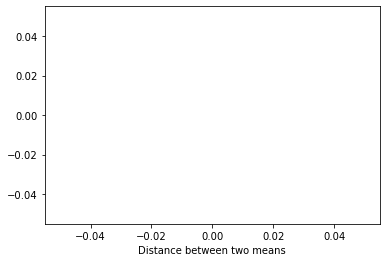

[1.0, 1.0, 0.9729063829127289, 0.7888440332776987, 0.7657846423151707, 0.7998558429980075, 0.8128047915491851, 0.826523054174549, 0.8425276137658704, 0.8614419820174404, 0.8705335956745237, 0.878152139195476, 0.8876752184612503, 0.8999190140337978, 0.9162437887078468, 0.9226640425254479, 0.9310084678671613, 0.944915063585742, 0.9600295421390005, 0.9778328245868111]


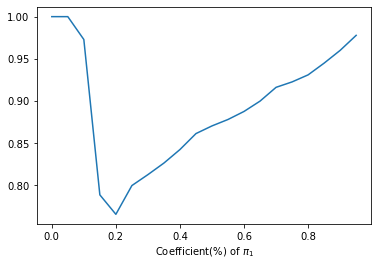

In [67]:
if __name__ == '__main__':

    # The following examples are also presented in paper

    # Single sample
    # you can change whatever data you like
    pi1 = 0.01130623
    pi2 = 0.00570773
    mu1 = [6.84873759, -1.52995325]
    mu2 = [11.16907695,  7.76572177]
    Sigma1 = [[8.46028669 ,-5.46179139],[-5.46179139 ,10.18132977]]
    Sigma2 = [[25.02361661 ,10.97183403],[10.97183403 ,35.43766835]]
    Bi = BiGauss(mu1, mu2, Sigma1, Sigma2, pi1, pi2)
    print('the OLR of this mixture Gaussian: {}'.format(Bi.OLR()))

    # OLR's changing over distance between two means
    step = 0.1
    pi1 = 0.5
    OLRs = []
    x = []
    mu1 = [6.84873759, -1.52995325]
    mu2 = [11.16907695,  7.76572177]
    Sigma1 = [[8.46028669 ,-5.46179139],[-5.46179139 ,10.18132977]]
    Sigma2 = [[25.02361661 ,10.97183403],[10.97183403 ,35.43766835]]
    while mu2[0] <= 8.0:
        pi2 = 1.0-pi1
        Bi = BiGauss(mu1, mu2, Sigma1, Sigma2, pi1, pi2)
        OLRs.append(Bi.OLR())
        x.append(mu2[0])
        mu2[0] += step
    plt.plot(x, OLRs)
    plt.xlabel('Distance between two means')
    plt.show()
    
    # OLR's changing over pi1
    step = 0.05
    pi1 = 0.0
    OLRs = []
    x = []
    mu1 = [6.84873759, -1.52995325]
    mu2 = [11.16907695,  7.76572177]
    Sigma1 = [[8.46028669 ,-5.46179139],[-5.46179139 ,10.18132977]]
    Sigma2 = [[25.02361661 ,10.97183403],[10.97183403 ,35.43766835]]
    while pi1 <= 1.0:
        pi2 = 1.0-pi1
        Bi = BiGauss(mu1, mu2, Sigma1, Sigma2, pi1, pi2)
        OLRs.append(Bi.OLR())
        x.append(pi1)
        pi1 += step
    print(OLRs)
    plt.plot(x, OLRs)
    plt.xlabel('Coefficient(%) of {}'.format(r"$\pi_1$"))
    plt.show()


# KL散度
衡量两个高斯分布的相似度.两个分布差异越大，KL散度越大，等于零时说明两个分布一样。

In [175]:
import numpy as np
import math

ModuleNotFoundError: No module named 'tensorflow'

In [7]:
def calculate_gaussian_kl_divergence(mu1,mu2,Sigma1,Sigma2,n):
    return 0.5(np.log(abs(Sigma2)/abs(Sigma1))+np.trace(np.linalg.inv(Sigma2)*Sigma1)+(mu1-mu2)*np.linalg.inv(Sigma2)*np.transpose(mu1-mu2)-n)

<>:3: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
<>:3: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
C:\Users\87119\AppData\Local\Temp\ipykernel_36408\2059254751.py:3: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
  return 0.5(np.log(abs(Sigma2)/abs(Sigma1))+np.trace(np.linalg.inv(Sigma2)*Sigma1)+(mu1-mu2)*np.linalg.inv(Sigma2)*np.transpose(mu1-mu2)-n)


# 数据迭代处理

In [112]:
filename_new = r'E:\2.实验数据\day14 control1\8_1\group_data_new.mat'
total_groups_new = io.loadmat(filename_new)
total_groups_load_new = total_groups_new['group_data_new']
print(type(total_groups_load_new))
print(total_groups_load_new.shape)

<class 'numpy.ndarray'>
(1591, 2391, 6)


In [113]:
total_groups_load_new_2D = (total_groups_load_new.reshape(total_groups_load_new.shape[0]*total_groups_load_new.shape[1],total_groups_load_new.shape[2]))
print(total_groups_load_new_2D.shape)

(3804081, 6)


In [67]:
X_scaler = StandardScaler()
x_data_new = X_scaler.fit_transform(total_groups_load_new_2D)
x_data_new.shape

(16658304, 9)

In [68]:
pca = PCA(n_components=2)
pca.fit(x_data_new)
data_pca_new = pca.transform(x_data_new)
print(data_pca_new.shape)

(16658304, 2)


In [69]:
pca.explained_variance_ratio_

array([0.81312311, 0.08250401])

In [114]:
model_GMM_new = GaussianMixture(n_components = 6)
dix_GMM_new = model_GMM_new.fit(total_groups_load_new_2D)

In [115]:
yhat_GMM_new = model_GMM_new.predict(total_groups_load_new_2D)

<class 'numpy.ndarray'>


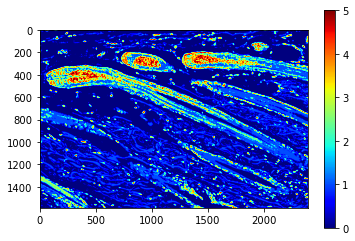

In [116]:
cluster_result_GMM_new = yhat_GMM_new.reshape(total_groups_load_new.shape[0],total_groups_load_new.shape[1])
plt.imshow(cluster_result_GMM_new,cmap = 'jet')
plt.colorbar()
plt.savefig('cluster_result_GMM_new1.jpg',dpi=5000,bbox_inches='tight')
print(type(cluster_result_GMM_new))

In [117]:
cluster_1 = np.array([yhat_GMM_new == 0])
clusters_1 = cluster_1 + 0
clusters_1 = clusters_1.reshape(total_groups_load.shape[0],total_groups_load.shape[1])
cluster_2 = np.array([yhat_GMM_new == 1])
clusters_2 = cluster_2 + 0
clusters_2 = clusters_2.reshape(total_groups_load.shape[0],total_groups_load.shape[1])
cluster_3 = np.array([yhat_GMM_new == 2])
clusters_3 = cluster_3 + 0
clusters_3 = clusters_3.reshape(total_groups_load.shape[0],total_groups_load.shape[1])
cluster_4 = np.array([yhat_GMM_new == 3])
clusters_4 = cluster_4 + 0
clusters_4 = clusters_4.reshape(total_groups_load.shape[0],total_groups_load.shape[1])
cluster_5 = np.array([yhat_GMM_new == 4])
clusters_5 = cluster_5 + 0
clusters_5 = clusters_5.reshape(total_groups_load.shape[0],total_groups_load.shape[1])
cluster_6 = np.array([yhat_GMM_new == 5])
clusters_6 = cluster_6 + 0
clusters_6 = clusters_6.reshape(total_groups_load.shape[0],total_groups_load.shape[1])
cluster_7 = np.array([yhat_GMM_new == 6])
clusters_7 = cluster_7 + 0
clusters_7 = clusters_7.reshape(total_groups_load.shape[0],total_groups_load.shape[1])
cluster_8 = np.array([yhat_GMM_new == 7])
clusters_8 = cluster_8 + 0
clusters_8 = clusters_8.reshape(total_groups_load.shape[0],total_groups_load.shape[1])

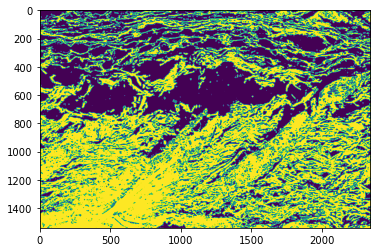

In [489]:
expect_cluster = clusters_2 + clusters_3 + clusters_4 + clusters_5 + clusters_6 +clusters_7 + clusters_8
plt.imshow(expect_cluster)
plt.savefig('expect_cluster.jpg',dpi=5000,bbox_inches='tight')

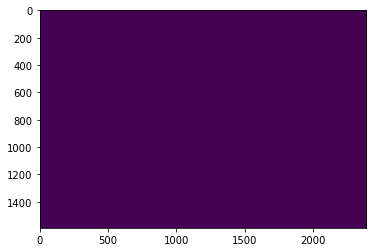

In [118]:
plt.imshow(clusters_1)
plt.savefig('clusters_1.jpg',dpi=1000,bbox_inches='tight')
plt.imshow(clusters_2)
plt.savefig('clusters_2.jpg',dpi=1000,bbox_inches='tight')
plt.imshow(clusters_3)
plt.savefig('clusters_3.jpg',dpi=1000,bbox_inches='tight')
plt.imshow(clusters_4)
plt.savefig('clusters_4.jpg',dpi=1000,bbox_inches='tight')
plt.imshow(clusters_5)
plt.savefig('clusters_5.jpg',dpi=1000,bbox_inches='tight')
plt.imshow(clusters_6)
plt.savefig('clusters_6.jpg',dpi=1000,bbox_inches='tight')
plt.imshow(clusters_7)
plt.savefig('clusters_7.jpg',dpi=1000,bbox_inches='tight')
plt.imshow(clusters_8)
plt.savefig('clusters_8.jpg',dpi=1000,bbox_inches='tight')

In [119]:
weights_GMM = dix_GMM_new.weights_
means_GMM = dix_GMM_new.means_
covariance_GMM = dix_GMM_new.covariances_
proba = model_GMM_new.predict_proba(total_groups_load_new_2D)
proba.shape
print(weights_GMM.shape)
print(means_GMM.shape)
print(covariance_GMM.shape)
print(weights_GMM)
print(means_GMM)
print(covariance_GMM)

(6,)
(6, 6)
(6, 6, 6)
[0.58954756 0.31427301 0.0053317  0.00696003 0.06750785 0.01637985]
[[1.17545096e-02 1.12131429e-02 4.13662171e-03 1.17268509e+00
  1.90377729e-02 4.94078732e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.90358464e-02 4.31662910e-02 4.00239893e-02 9.61034083e+00
  9.11669294e-01 4.57738315e-01]
 [1.07756649e-01 1.20718504e-01 4.21390193e-02 3.05830161e+00
  2.45973580e-01 4.69112037e-01]
 [1.66033842e-02 2.23287617e-02 2.09172161e-02 2.14060338e+00
  8.61819182e-02 4.84700811e-01]
 [1.97898796e-02 2.90717979e-02 3.56106805e-02 3.86336335e+00
  2.67112747e-01 4.72125033e-01]]
[[[ 9.88250161e-05  9.68166980e-05  1.01362250e-05  2.51916677e-04
    1.82994671e-05 -3.73877895e-06]
  [ 9.68166980e-05  1.26583557e-04  1.20097769e-05  3.96459035e-04
    2.35661080e-05 -4.51288897e-06]
  [ 1.01362250e-05  1.20097769e-05  6.54477562e-06  6.08508551e-05
    7.35096343e-06 -1.80268826e-06]
  [ 2.51916677e-04  3.96459035

In [120]:
io.savemat('cluster_result_GMM_new.mat',{'cluster_result_GMM_new':cluster_result_GMM_new})
io.savemat('predict_proba.mat',{'proba':proba})
io.savemat('weights_GMM.mat',{'weights_GMM':weights_GMM})
io.savemat('means_GMM.mat',{'means_GMM':means_GMM})
io.savemat('covariance_GMM.mat',{'covariance_GMM':covariance_GMM})

In [205]:
filename = r'E:\2.实验数据\11\5\cluster_result_GMM.mat'
total_groups = io.loadmat(filename)
total_groups_load = total_groups['cluster_result_GMM']

In [209]:
cluster_1 = np.array(cluster_result_GMM == 0)
clusters_1 = cluster_1 + 0 + 0
cluster_2 = np.array(cluster_result_GMM == 1)
clusters_2 = cluster_2 + 0 + 6
cluster_3 = np.array(cluster_result_GMM == 2)
clusters_3 = cluster_3 + 0 + 2
cluster_4 = np.array(cluster_result_GMM == 3)
clusters_4 = cluster_4 + 0 + 5
cluster_5 = np.array(cluster_result_GMM == 4)
clusters_5 = cluster_5 + 0 + 1 
cluster = clusters_1 + clusters_2 + clusters_3 + clusters_4 + clusters_5

<class 'numpy.ndarray'>


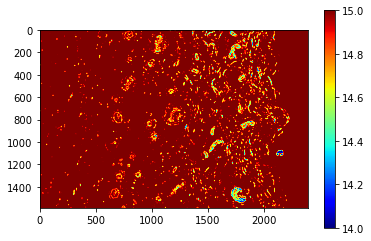

In [210]:
plt.imshow(cluster,cmap = 'jet')
plt.colorbar()
plt.savefig('cluster_result_GMM.jpg',dpi=5000,bbox_inches='tight')
print(type(cluster))